# TASK #1: UNDERSTAND THE PROBLEM STATEMENT 

- The objective of this case study is to predict the employee salary based on the number of years of experience. 
- In simple linear regression, we predict the value of one variable Y based on another variable X.
- X is called the independent variable and Y is called the dependant variable.
- Why simple? Because it examines relationship between two variables only.
- Why linear? when the independent variable increases (or decreases), the dependent variable increases (or decreases) in a linear fashion.


# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
# install seaborn library
!pip install seaborn
!pip install tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 22.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 25.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 27.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 25.3 MB/s eta 0:00:00


2024-11-30 10:27:23.826931: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732962443.867025    7988 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732962443.889176    7988 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-30 10:27:23.935255: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Matplotlib is building the font cache; this may take a moment.


In [8]:
# read the csv file 
salary_df = pd.read_csv('salary.csv')

In [9]:
salary_df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

<Axes: >

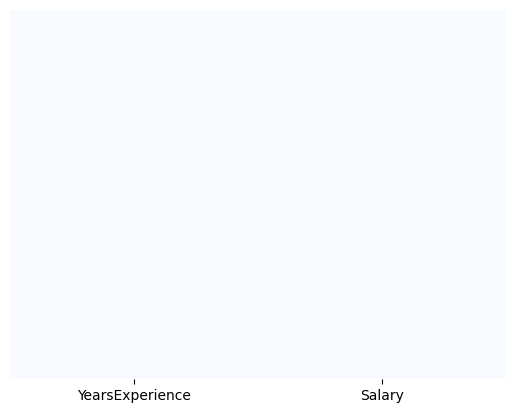

In [10]:
# check if there are any Null values
sns.heatmap(salary_df.isnull(), yticklabels = False, cbar = False, cmap="Blues") #disable y tick, colour bar,  color map as blue

#Here we can see only one colour meaning there is no null here.


In [11]:
# Check the dataframe info

salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [12]:
# Statistical summary of the dataframe

salary_df.describe()
# To know minimum, maximum values, standard daviation etc.
#Here we have 35 samples for YearsExperience and salary
#the standard daviation is std


,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

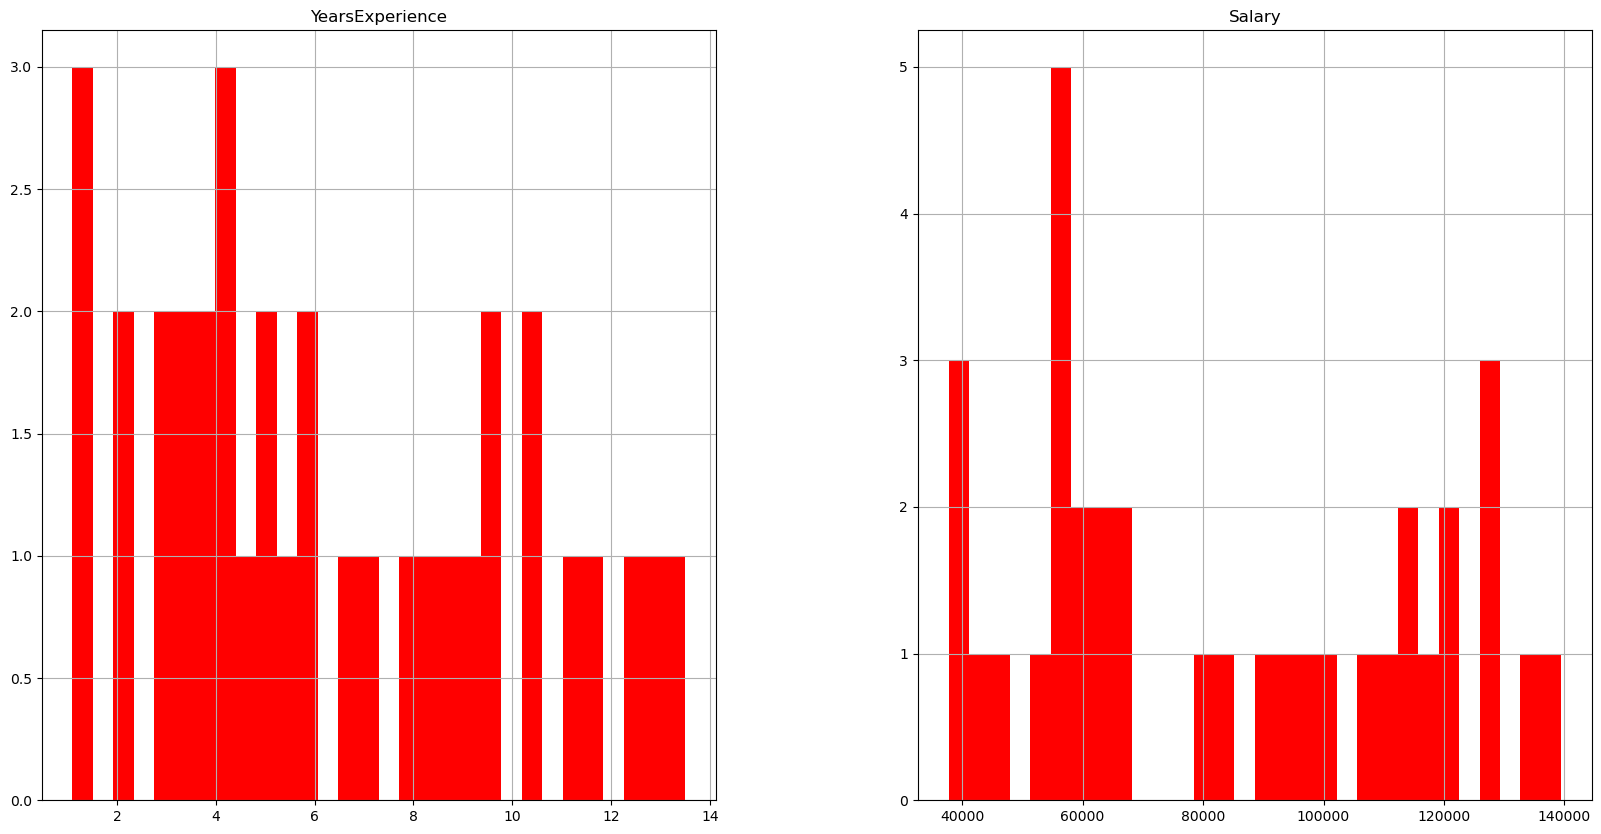

In [13]:
#histogram
salary_df.hist(bins = 30, figsize = (20,10), color = 'r')

#number in y axix and YearsOfExperience or salary in X axis


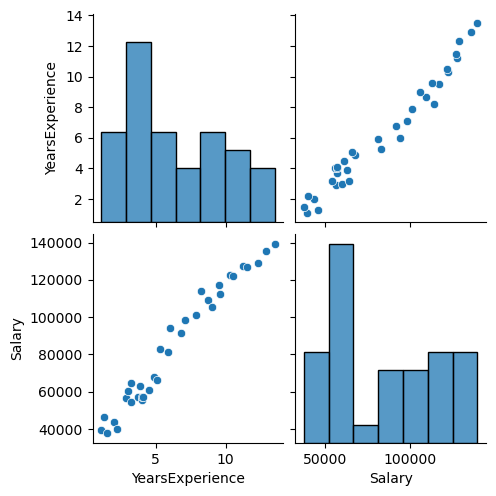

In [14]:
# plot pairplot

sns.pairplot(salary_df) #less bins used

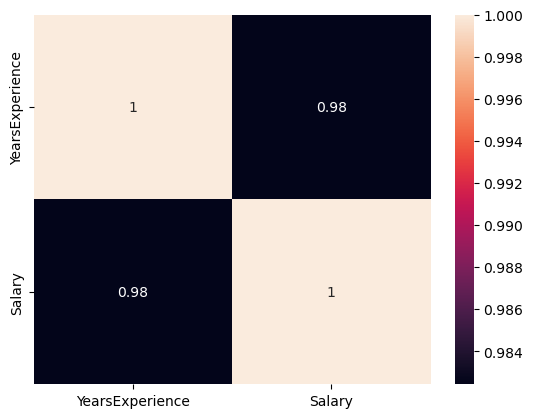

In [15]:
corr_matrix = salary_df.corr() #correlation matrix
sns.heatmap(corr_matrix, annot = True) #annot=True show actual value in matrix
plt.show()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

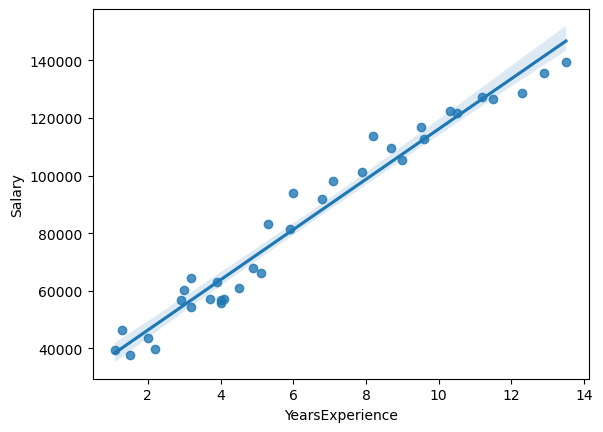

In [10]:
#- Use regplot in Seaborn to obtain a straight line fit between "salary" and "years of experience"
sns.regplot(x = 'YearsExperience', y = 'Salary',  data= salary_df)

# TASK #4: CREATE TRAINING AND TESTING DATASET

In [17]:
X = salary_df[['YearsExperience']]
y = salary_df[['Salary']]


In [18]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [19]:
y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


In [20]:
X.shape #35 samples

(35, 1)

In [21]:
y.shape

(35, 1)

In [22]:
X = np.array(X).astype('float32') #making arays with float32 format as it will be needed later
y = np.array(y).astype('float32')

In [23]:
# Only take the numerical variables and scale them
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]], dtype=float32)

In [24]:
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.],
       [127345.],
       [126756.],
       [128765.],
       [135675.],
       [139465.]], dtype=float32)

In [25]:
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [26]:
X_train

array([[ 7.1],
       [ 2.9],
       [ 1.5],
       [ 9.6],
       [11.5],
       [ 5.3],
       [ 3.7],
       [11.2],
       [ 9.5],
       [ 4. ],
       [ 6. ],
       [ 4.1],
       [ 3.2],
       [ 1.1],
       [10.3],
       [ 5.9],
       [ 7.9],
       [ 9. ],
       [ 3. ],
       [ 3.9],
       [ 1.3],
       [12.3],
       [10.5],
       [ 6.8],
       [13.5],
       [ 2.2],
       [ 4.5],
       [ 8.2]], dtype=float32)

In [28]:
X_test

array([[ 5.1],
       [ 4. ],
       [ 8.7],
       [ 4.9],
       [ 2. ],
       [12.9],
       [ 3.2]], dtype=float32)

# TASK #5: TRAIN A LINEAR REGRESSION MODEL IN SK-LEARN (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [29]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression(fit_intercept = True) #allowing b to have some value with (fit_intercept=True
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression()

In [30]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.9619287252426147

In [32]:
#y=mx+c
print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_) #m
print('Linear Model Coefficient (c): ', regresssion_model_sklearn.intercept_)#c

Linear Model Coefficient (m):  [[8654.942]]
Linear Model Coefficient (c):  [30263.195]


# TASK #6: EVALUATE TRAINED MODEL PERFORMANCE (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

Text(0.5, 1.0, 'Salary vs. Years of Experience')

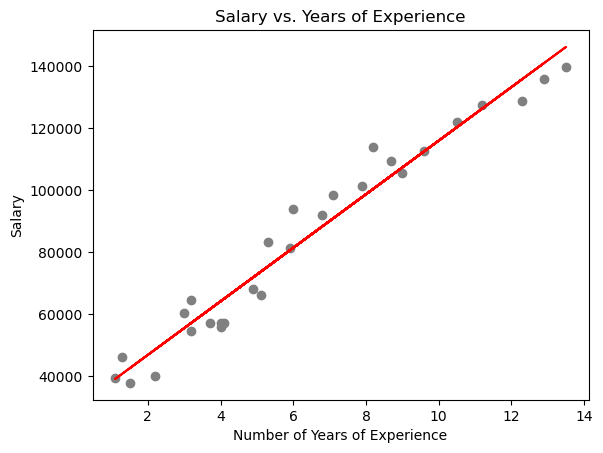

In [24]:
plt.scatter(X_train, y_train, color = 'gray') #data points for the training data.
plt.plot(X_train, regresssion_model_sklearn.predict(X_train), color = 'red') #the linear line from the model
plt.ylabel('Salary')
plt.xlabel('Number of Years of Experience')
plt.title('Salary vs. Years of Experience')

In [33]:
y_predict = regresssion_model_sklearn.predict(X_test) #using my model to predict y values  for my X test data

In [34]:
y_predict

array([[ 74403.41 ],
       [ 64882.965],
       [105561.195],
       [ 72672.414],
       [ 47573.08 ],
       [141911.94 ],
       [ 57959.01 ]], dtype=float32)

# TASK #7: TRAIN A LINEAR LEARNER MODEL USING SAGEMAKER

In [43]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = Session().default_bucket()
# Let's define the S3 bucket and prefix that we want to use in this session
# bucket = 'sagemaker-practica' # bucket named 'sagemaker-practical' was created beforehand
prefix = 'linear_learner' # prefix is the subfolder within the bucket.

# Let's get the execution role for the notebook instance. 
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3). 
role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::888818547702:role/service-role/AmazonSageMakerServiceCatalogProductsUseRole


In [44]:
#Session().default_bucket() #check the bucket name

'sagemaker-us-east-1-888818547702'

In [37]:
X_train.shape

(28, 1)

In [38]:
y_train.shape

(28, 1)

In [39]:
y_train = y_train[:,0] #making it a vector

In [40]:
y_train.shape

(28,)

In [45]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner 

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing all my training data)
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 
buf.seek(0)


0

In [46]:
#storing my training data

import os

# Code to upload RecordIO data to S3
 
# Key refers to the name of the file    
key = 'linear-train-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key) #first {} means train, second one means prefic and third one means key
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-us-east-1-888818547702/linear_learner/train/linear-train-data


In [47]:
X_test.shape

(7, 1)

In [48]:
y_test.shape

(7, 1)

In [49]:
# Make sure that the target label is a vector
y_test = y_test[:,0]


In [50]:
y_test.shape #now a vector

(7,)

In [52]:
# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner 

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing all my training data)
smac.write_numpy_to_dense_tensor(buf, X_test, y_test)
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 
buf.seek(0)

0

In [53]:
#Storing test data

# Key refers to the name of the file    
key = 'linear-test-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(buf)

#prefix was the subfolder. Creating a folder test and attaching the key (linear-test-data)
#specified the bucket  using Bucket(bucket)

# Let's print out the testing data location in s3
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key) #first  {} means bucket, second {} means prefix and third {} means key
print('uploaded training data location: {}'.format(s3_test_data))

uploaded training data location: s3://sagemaker-us-east-1-888818547702/linear_learner/test/linear-test-data


In [55]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-us-east-1-888818547702/linear_learner/output


In [56]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the linearLearner container image

# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session

from sagemaker.amazon.amazon_estimator import get_image_uri
 # Note that all regression models are named estimators

container = get_image_uri(boto3.Session().region_name, 'linear-learner') #boto3.Session().region_name gives region name and using 'linear-learner' algorithm

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [57]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training
# sagemaker_session = sagemaker.Session()

#the model
"""linear = sagemaker.estimator.Estimator(container, 
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)"""

#For less cost, use this one
linear = sagemaker.estimator.Estimator(container, 
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session,
                                       train_use_spot_instances=True, #unused ec2 instance to be used for less cost
                                       train_max_run=300,
                                       train_max_wait=600)

# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

#setting it's parameters
linear.set_hyperparameters(feature_dim = 1, #1 input (years of experience)
                           predictor_type = 'regressor', #regression task
                           mini_batch_size = 5, #how many data points to feed at a time
                           epochs = 5, #how many times
                           num_models = 32, #you can run multiple models in parallel and give the best one
                           loss = 'absolute_loss') #loss function.

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_max_run has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_use_spot_instances has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_max_wait has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: linear-learner-2024-11-30-11-24-55-301


2024-11-30 11:24:55 Starting - Starting the training job...
2024-11-30 11:25:21 Starting - Preparing the instances for training......
2024-11-30 11:26:28 Downloading - Downloading the training image.........
2024-11-30 11:27:54 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/30/2024 11:28:01 INFO 139813265250112] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss': 'auto', 'margin': '1.0', 'quantile': '0.5', 'loss_insen

# TASK #8: DEPLOY AND TEST THE TRAINED LINEAR LEARNER MODEL 

In [58]:
# Deploying the model to perform inference 

linear_regressor = linear.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: linear-learner-2024-11-30-11-34-25-904
INFO:sagemaker:Creating endpoint-config with name linear-learner-2024-11-30-11-34-25-904
INFO:sagemaker:Creating endpoint with name linear-learner-2024-11-30-11-34-25-904


--------!

In [59]:
#from sagemaker.predictor import csv_serializer, json_deserializer
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer
# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.

# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type

# Deserializer accepts two arguments, the result data and the response content type, and return a sequence of bytes in the specified content type.

# Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html

linear_regressor.content_type = 'text/csv'
linear_regressor.serializer = CSVSerializer()
linear_regressor.deserializer = JSONDeserializer()

In [60]:
# making prediction on the test data

result = linear_regressor.predict(X_test)

In [61]:
result # results are in Json format

{'predictions': [{'score': 72438.234375},
  {'score': 63254.99609375},
  {'score': 102492.46875},
  {'score': 70768.5546875},
  {'score': 46558.1953125},
  {'score': 137555.75},
  {'score': 56576.27734375}]}

In [62]:
# Since the result is in json format, we access the scores by iterating through the scores in the predictions

predictions = np.array([r['score'] for r in result['predictions']])

In [63]:
predictions

array([ 72438.234375  ,  63254.99609375, 102492.46875   ,  70768.5546875 ,
        46558.1953125 , 137555.75      ,  56576.27734375])

In [51]:
predictions.shape

(7,)

Text(0.5, 1.0, 'Salary vs. Years of Experience')

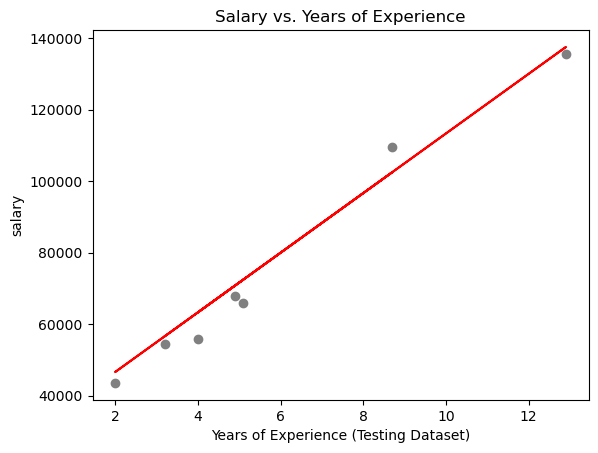

In [64]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, predictions, color = 'red')
plt.xlabel('Years of Experience (Testing Dataset)')
plt.ylabel('salary')
plt.title('Salary vs. Years of Experience')

In [65]:
# Delete the end-point

linear_regressor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: linear-learner-2024-11-30-11-34-25-904
INFO:sagemaker:Deleting endpoint with name: linear-learner-2024-11-30-11-34-25-904


# EXCELLENT JOB! NOW YOU'RE FAMILIAR WITH SAGEMAKER LINEAR LEARNER, YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS